In [87]:
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pandas_profiling
import matplotlib.dates as mdates

## The datasets
>The data comes from [ClimateBC](http://climatebc.ca/) and [ClimateNA](http://climatena.ca/), two websites provided by Dr. Wang, a Professor in the Forestry Department at UBC in Vancouver. The websites provides tools to downscale meorological data from the PRISM climate group to observe long term and short term trends in the climate. With this, it is possible to choose any location in North America and receive highly detailed climate data for that location dating back to 1901.
The data is very extensive, so the difficulty lays in choosing which variables to observe and compare over time. For my project - determining the signs of climate change in ski resorts, it fits perfectly. By obtaining climate data for the location of several ski resorts in coastal and continental regions, I will be able to follow climatic trends that those regions are experiencing. Specifically the measurements {PAS - precipitation as snow} will prove useful in showing important developments for the ski resorts. Additionally, it is certainly helpful to compare the average temperature and the degree-days below 0°C {DD<0} to detect any major trends in the data. The degree-days below °C note how many days multiplied by how many degrees below freezing have occured in the measured timeline.
I expect to see an observable decline in precipitation as snow on the coastal ski resorts since those have been particularly affected by climate change.The changes in average temperature will also indicate if major changes have occured in the investigated locations. However, I also don't expect to see too many changes, potentially not even clearly destinguishable trends in the continental ski resorts. Some of the continental resorts might even show an improvement in ski conditions because climate change induced changes can even increase snowfall for continental locations for now.

## This dataset

>The dataset analyzed in this notebook covers data from Whistler Blackcomb, the enormous resort in British Columbia just north of Vancouver.
The code used to clean, slice, visualize and compare the data will work for data of all other ski resorts that are to be analyzed in the future as well. Hopefully, I will get to add many more in the course of this project.

In [2]:
# exploring dataframe for a specific location
# key to important variables is in (..\data\raw\README.md)
df = pd.read_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\raw\ClimateData_Whistler.csv')

In [3]:
df.describe()
df.head()

Lat      long   elev     period  MAT   MWMT   MCMT    TD   MAP   MSP   \
0  50.1038 -122.9136   1480  year_1901   2.4   12.3   -6.2  18.5  1557   356   
1  50.1038 -122.9136   1480  year_1902   1.8   10.6   -5.9  16.6  1649   335   
2  50.1038 -122.9136   1480  year_1903   1.7   10.4   -4.4  14.8  1565   601   
3  50.1038 -122.9136   1480  year_1904   2.4   11.1   -4.6  15.8  1448   269   
4  50.1038 -122.9136   1480  year_1905   2.2   11.9   -4.9  16.9  1268   485   

   ...  RH(03)   RH(04)   RH(05)   RH(06)   RH(07)   RH(08)   RH(09)   \
0  ...       68       67       63       64       65       60       66   
1  ...       70       66       65       58       65       61       62   
2  ...       59       67       62       61       69       70       75   
3  ...       68       62       61       58       60       57       61   
4  ...       69       59       58       60       60       65       72   

   RH(10)   RH(11)   RH(12)   
0       69       76       75  
1       67       73       75  
2       67       70       74  
3       71       70       77  
4       66       67       76  

[5 rows x 251 columns]

In [40]:
# exploring the dataframe
df.iloc[:,20:50]
# df.iloc[:,50:80]
# df.iloc[:,80:110]
# df.iloc[:,110:140]
# df.iloc[:,140:170]
# df.iloc[:,170:200]
# df.iloc[:,200:230]

PAS   EMT   EXT     MAR   Eref   CMD   RH   Tmax_wt   Tmax_sp   Tmax_sm   \
0     748 -34.3  28.8 -9999.0    416   107   68      -2.0       5.9      15.3   
1     978 -34.3  28.8 -9999.0    456   128   67      -0.1       4.8      15.1   
2     763 -34.3  28.8 -9999.0    392    20   68      -2.2       4.1      15.3   
3     966 -34.3  28.8 -9999.0    504   148   66      -2.2       5.3      16.6   
4     487 -34.3  28.8 -9999.0    478   102   66      -1.5       7.1      16.5   
..    ...   ...   ...     ...    ...   ...  ...       ...       ...       ...   
114   431 -29.6  28.7 -9999.0    496   206   75       1.3       7.6      16.8   
115   566 -29.6  28.7 -9999.0    450   115   78      -0.5       7.9      14.7   
116   790 -29.6  28.7 -9999.0    437   214   77      -3.4       4.6      16.5   
117   612 -29.6  28.7 -9999.0    435   187   77      -1.7       6.3      15.2   
118   405 -29.6  28.7 -9999.0    413   110   76      -1.9       7.0      14.7   

     ...  PPT_sp   PPT_sm   PPT_at   Rad_wt   Rad_sp   Rad_sm   Rad_at   \
0    ...      297      198      521  -9999.0  -9999.0  -9999.0  -9999.0   
1    ...      433      139      435  -9999.0  -9999.0  -9999.0  -9999.0   
2    ...      279      255      690  -9999.0  -9999.0  -9999.0  -9999.0   
3    ...      392      152      275  -9999.0  -9999.0  -9999.0  -9999.0   
4    ...      282      179      520  -9999.0  -9999.0  -9999.0  -9999.0   
..   ...      ...      ...      ...      ...      ...      ...      ...   
114  ...      175      194      324  -9999.0  -9999.0  -9999.0  -9999.0   
115  ...      290      175      647  -9999.0  -9999.0  -9999.0  -9999.0   
116  ...      433       50      503  -9999.0  -9999.0  -9999.0  -9999.0   
117  ...      219      119      526  -9999.0  -9999.0  -9999.0  -9999.0   
118  ...      142      150      359  -9999.0  -9999.0  -9999.0  -9999.0   

     DD<0_wt   DD<0_sp   DD<0_sm   
0         516       167         2  
1         471       209         2  
2         488       278         1  
3         530       221         1  
4         511       113         1  
..        ...       ...       ...  
114       262        83         0  
115       414        77         1  
116       458       160         1  
117       384       149         1  
118       425       113         1  

[119 rows x 30 columns]

> It seems like there is something wrong with the Radiation data (negative radiation).
The data assumes the Value **-9999.0** instead of **NaN** as null value. 
The majority of values is invalid, hence I will probably drop the column.

In [115]:
# let's take a closer look some annual variables:
# Selecting specific columns since the dataset would be too big to run otherwise.
# Warning: loading this might take quite a bit of processing time.

df.annual = df.iloc[:,[4,5,6,12,13,16,20,26]]
df.annual_c = df.annual.copy()
df.annual_c.profile_report()

## First observations:
- The dataframe is massive, it will require some cleaning and wrangling to draw conclusions.
- Radiation data has many invalid values
- Clear negative relationship between mean annual temperature (MAT) and degree-days below freezing (DD<0°C)
- There seems to be some form of correlation between relative humidity (RH) and the number of frost-free days (NFFD)
- Annual data is limited to draw conclusions from, since data from the summer months obstructs the view onto the more interesting winter data.

## Data Wrangling

In [4]:
# Method chaining and creating a function for all my datasets with the same format
# For analysis purposes, this function singles out the annual, seasonal and monthly variables.

def load_and_process(path_to_csv_file):
    
    # separating monthaly variables from the dataframe
    # load data and select variables of interest
    dataframe = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,83:251]
    )
    
    # Create dataframe with a column of labelled years
    annual_m = np.arange(1901, 2020, 1).repeat(12)
    annual_m2 = np.vstack(annual_m)
    years_m = pd.DataFrame(data = annual_m2)
    
    # Create list of Strings for each month for the 119 years in the dataframe
    months = [('Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')*119]
    months2 = (
        pd.DataFrame(months)
        .melt()
    )
    

    # Transpose and then melt monthly observations in Dataframe to get individual variables in separate columns and the months as observations instead of variables
    global monthly_data
    monthly_data = [months2, years_m] 
    for i in range(14):
        monthly_data.append(dataframe.iloc[:,i*12:(i+1)*12].T.melt())
    
    # Cleaning dataframe
    monthly_data = (
                    pd.concat(monthly_data, axis = 1)
                    .drop(columns = 'variable')
    )
    
    # Label selected columns of interest(variables)
    monthly_data.columns = ['Month','Year','Max Temp', 'Min Temp', 'Ave Temp', 'Precipitation', 'Radiation', 'DDays < 0°C', 'DDays > 5°C', 
                            'DDays < 18°C', 'DDays > 18°C', 'Frost Free Days', 'Snowfall', 'Evaporation', 
                            'Moisture Deficit', 'Relative Humidity']
#     print(monthly_data)


    # separating seasonal winter variables from the dataframe for a better analysis 
    dataframe_s = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,[27,31,35,39,47,51,55,59,63,67,71,75,79]]
    )
    
    # label years, fit together with rest of the dataframe
    annual_w = np.arange(1901, 2020, 1)
    annual_w2 = np.vstack(annual_w)
    years_s = pd.DataFrame(data = annual_w2)
    seasons = [years_s, dataframe_s]
    
    global seasonal_data
    seasonal_data = pd.concat(seasons, axis = 1)
    
    # label columns (variables)
    seasonal_data.columns = ['Year','Max Temp', 'Min Temp', 'Ave Temp', 'Precipitation', 'DDays < 0°C', 'DDays > 5°C', 
                            'DDays < 18°C', 'DDays > 18°C', 'Frost Free Days', 'Snowfall', 'Evaporation', 
                            'Moisture Deficit', 'Relative Humidity']
#     print(seasonal_data)


    # separating annual variables from the dataframe
    dataframe_a = (
                pd.read_csv(path_to_csv_file)
                .iloc[:,4:27]
    )
    years = [years_s, dataframe_a]
    
    global yearly_data
    yearly_data = pd.concat(years, axis = 1)
    
    # label columns (variables)
    yearly_data.columns = ['Year','Ave Temp','Warmest Month', 'Coldest Month','Difference', 'Mean Precip','May-Sep Precip','Heat-Moist I', 
                           'Summer Heat-Moist I', 'DDays < 0°C', 'DDays > 5°C', 'DDays < 18°C', 'DDays > 18°C', 
                           'Frost Free Days','Begin FFP','End FFP','Frost Free Period', 'Snowfall', 'Min Temp (30)', 'Max Temp (30)', 'Radiation',
                           'Evaporation', 'Moisture Deficit', 'Relative Humidity']
#     print(yearly_data)
    
load_and_process(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\raw\ClimateData_Whistler.csv')




> By plugging in different datasets for different locations into the function, 
it is now possible to create single datasets for annual, seasonal and monthly variables for each location.
The datasets will be saved in the \data\processed directory:

In [ ]:
# saving output data into files

monthly_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\ClimateData_Whistler_months.csv', index=False)
seasonal_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\ClimateData_Whistler_seasons.csv', index=False)
yearly_data.to_csv(r'C:\Users\Len\Documents\GitHub\solo_502\course-project-solo_502\data\processed\ClimateData_Whistler_years.csv', index=False)

# Research questions

- Is climate change affecting ski resorts in North America? 
- How does it show?

## Subquestions
- Are there any variables in the data which show distinctive trends over the investigated time?
- Are those variables generally associated with climate change?
- How do coastal ski resorts compare to continental ski resorts?

# Analysis and visualizations of the cleaned data

> The investigation of the dataset at the beginning of this analysis showed, that annual data is very superficial.
There are many trends and many causes that can skew the data and make it improbable to find important signs of climate change in my area of interest.
Hence I will mainly look at seasonal (winter) and at monthly data to determine how climate change might be influencing the investigated ski resorts.
The variables which are particularly interesting for the research questions are *Degree-days < 0, Temperature(min, ave, max) and Snowfall. 
Because the main research looks at changes in temperature and snowfall over time, the visuals used are mainly line plots.

## Seasonal winter data

In [5]:
# exploring seasonal data 
seasonal_data.shape
seasonal_data.head(10)
seasonal_data.columns
seasonal_data.describe().apply(lambda s: s.apply(lambda x: format (x, 'f')))

Year    Max Temp    Min Temp    Ave Temp Precipitation  \
count   119.000000  119.000000  119.000000  119.000000    119.000000   
mean   1960.000000   -1.957983   -7.651261   -4.803361    579.168067   
std      34.496377    1.605895    2.130603    1.820688    157.125035   
min    1901.000000   -7.100000  -13.400000  -10.300000    200.000000   
25%    1930.500000   -2.650000   -8.850000   -5.700000    460.500000   
50%    1960.000000   -1.800000   -7.600000   -4.700000    580.000000   
75%    1989.500000   -0.950000   -6.050000   -3.450000    683.000000   
max    2019.000000    1.300000   -3.200000   -0.900000    998.000000   

      DDays < 0°C DDays > 5°C DDays < 18°C DDays > 18°C Frost Free Days  \
count  119.000000  119.000000   119.000000   119.000000      119.000000   
mean   507.941176    4.378151  2047.134454     0.000000        7.260504   
std    125.979908    2.473561   148.014768     0.000000        3.763028   
min    262.000000    1.000000  1715.000000     0.000000        1.000000   
25%    416.000000    3.000000  1938.500000     0.000000        5.000000   
50%    489.000000    4.000000  2029.000000     0.000000        6.000000   
75%    578.000000    6.000000  2133.000000     0.000000        9.000000   
max    922.000000   15.000000  2506.000000     0.000000       22.000000   

         Snowfall Evaporation Moisture Deficit Relative Humidity  
count  119.000000  119.000000       119.000000        119.000000  
mean   404.806723    0.117647         0.000000         75.949580  
std    135.508914    1.283378         0.000000          4.452858  
min    158.000000    0.000000         0.000000         66.000000  
25%    299.500000    0.000000         0.000000         73.000000  
50%    398.000000    0.000000         0.000000         75.000000  
75%    494.000000    0.000000         0.000000         78.500000  
max    701.000000   14.000000         0.000000         87.000000

Text(0.5, 1.03, 'Correlation between variables')

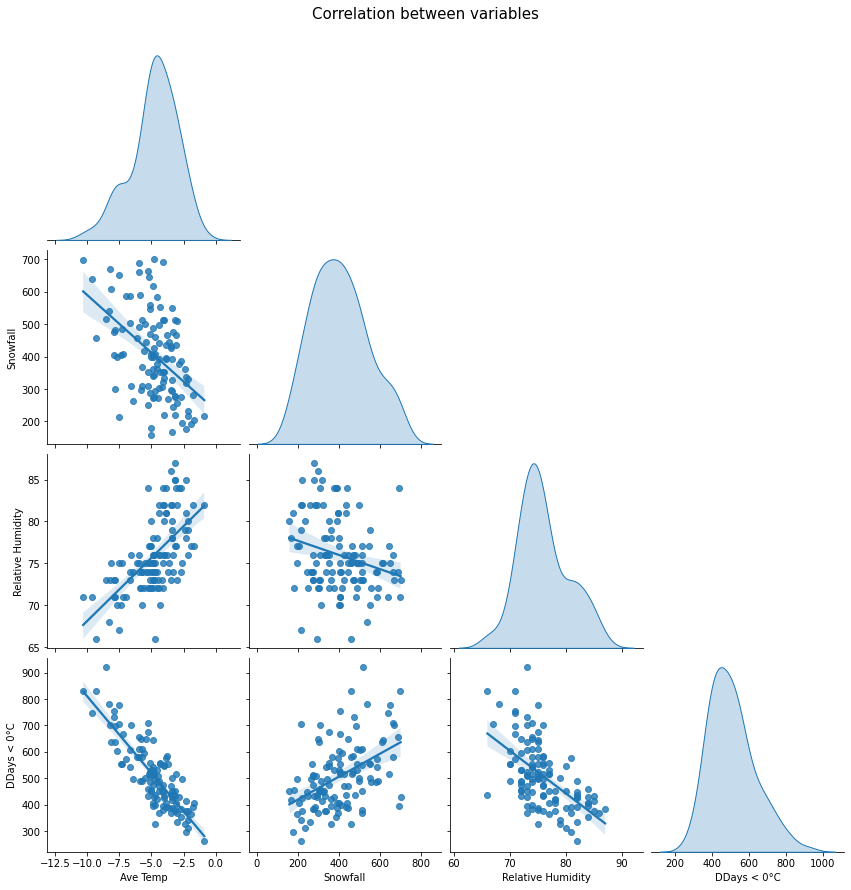

In [159]:
# Trying to observe potential correlations between different variables at seasonal observations

selected_df_winter = seasonal_data.loc[:,['Ave Temp', 'Snowfall', 'Relative Humidity', 'DDays < 0°C']]
sns.pairplot(selected_df_winter, 
             kind = 'reg', 
             diag_kind='kde', 
             height=3,
             corner=True
            )
plt.suptitle('Correlation between variables', y=1.03, fontsize=15)

> Just by looking at the graphs, it appears that there is a approximately linear relationship between Average Temperature and Degree-days below freezing and between
Temperature and Relative Humidity. Both correlations seem reasonable: Lower temperature implies more degree-days below freezing and cold air can only hold less humidity than warm air. 
Other correlations between the variables are tougher to see at a first glance and might be less strong or simply not existant.

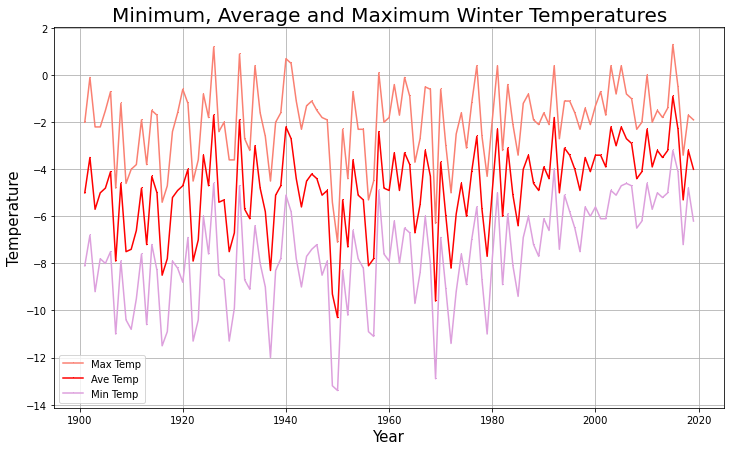

In [143]:
# Let's investigate how some variables change over time.

# Visualizing average, max, min winter termperatures over time
plt.figure(figsize = (12,7))
plt.plot(seasonal_data['Year'], seasonal_data['Max Temp'], linestyle='solid', marker=',', color='salmon')
plt.plot(seasonal_data['Year'], seasonal_data['Ave Temp'], linestyle='solid', marker=',', color='red')
plt.plot(seasonal_data['Year'], seasonal_data['Min Temp'], linestyle='solid', marker=',', color='plum')

# Creating labels and the grid
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature', fontsize = 15)
plt.legend(['Max Temp', 'Ave Temp', 'Min Temp'])
plt.title('Minimum, Average and Maximum Winter Temperatures', fontsize = 20)
plt.grid(True)

> Over the years, minimum and maximum temperatures edge closer together. 
This phenomenon could be explained due to uncertainity in early temperature measurements or because of changing climatic conditions. 
However, the data also shows a slight but steady warming trend since around 1970.

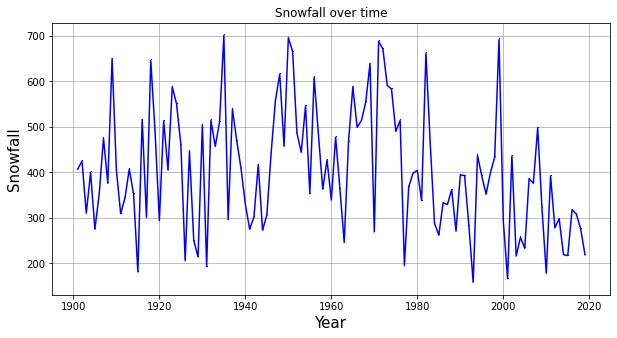

In [10]:
# Snowfall over time in the winter 

plt.figure(figsize = (10,5))
plt.plot(seasonal_data['Year'], 
         seasonal_data['Snowfall'], 
         linestyle='solid', 
         marker=',', color='blue')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Snowfall', fontsize = 15)
plt.title('Snowfall over time')
plt.grid(True)


> There is lots of *background noise* in the data, obstructing any clear major trends. It would be better to investigate with a fitting trendline perhaps

Text(0.5, 1.0, 'Snowfall over time')

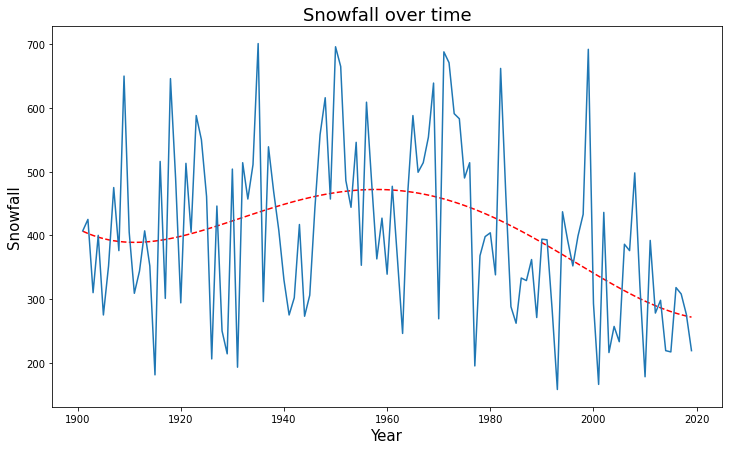

In [142]:
# Same graph with added trendline

X = np.array(seasonal_data['Year'])
Y = np.array(seasonal_data['Snowfall'])
fig, ax = plt.subplots(figsize = (12,7))
np.shape(X)
np.shape(Y)
Z = np.polyfit(X, Y, 4)
ZZ = np.poly1d(Z)
ax.plot(X, ZZ(X),'r--')
ax.plot(X, Y)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Snowfall', fontsize = 15)
plt.title('Snowfall over time', fontsize = 18)
# plt.grid(True)

> The graph shows an increase in snowfall in the earlier records and a lower general snowfall level since about 1980. To fully understand recent trends it would be good to have continuing data into the future as it is not crystal clear yet.

## Monthly data

In [160]:
# Specifying the months of interest. The different lists of months serves to investigate the data from different perspectives.
winter_months_short = ['Jan', 'Feb']
winter_months = ['Dec', 'Jan', 'Feb']
winter_months2 = ['Nov', 'Dec', 'Jan', 'Feb', 'Mar']
winter_months3 = ['Oct','Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']
# Using different months requires quick changes in the following graphs! 
# Some of them turn messy or simply don't work when dealing with too many months though.

# Merging the Month and the Year into one column
monthly_data_winter = monthly_data.loc[monthly_data['Month'].isin(winter_months2)]
monthly_data_winter = monthly_data_winter.assign(Year_month = monthly_data_winter.Year.astype(str) + ' ' + monthly_data_winter.Month.astype(str))

monthly_data_winter

Month  Year  Max Temp  Min Temp  Ave Temp  Precipitation  Radiation  \
0      Jan  1901      -3.4      -8.9      -6.2            206    -9999.0   
1      Feb  1901      -1.9      -8.7      -5.3            158    -9999.0   
2      Mar  1901       2.1      -6.1      -2.0             99    -9999.0   
10     Nov  1901       3.0      -3.3      -0.1            278    -9999.0   
11     Dec  1901      -0.6      -6.6      -3.6            177    -9999.0   
...    ...   ...       ...       ...       ...            ...        ...   
1416   Jan  2019       0.4      -3.8      -1.7            151    -9999.0   
1417   Feb  2019      -4.4      -9.4      -6.9             24    -9999.0   
1418   Mar  2019       3.8      -4.5      -0.4              0    -9999.0   
1426   Nov  2019       2.8      -2.4       0.2             90    -9999.0   
1427   Dec  2019      -0.8      -4.6      -2.7            189    -9999.0   

      DDays < 0°C  DDays > 5°C  DDays < 18°C  DDays > 18°C  Frost Free Days  \
0             210            1           750             0                1   
1             169            1           648             0                1   
2             104            3           622             0                2   
10             65            8           544             0                7   
11            137            2           665             0                3   
...           ...          ...           ...           ...              ...   
1416           99            4           612             0                6   
1417          209            0           694             0                1   
1418           72            6           572             0                4   
1426           59            9           534             0                9   
1427          117            2           639             0                5   

      Snowfall  Evaporation  Moisture Deficit  Relative Humidity Year_month  
0          161            0                 0                 76   1901 Jan  
1          139            0                 0                 71   1901 Feb  
2           83            0                 0                 68   1901 Mar  
10         100            0                 0                 76   1901 Nov  
11         108            0                 0                 75   1901 Dec  
...        ...          ...               ...                ...        ...  
1416        57            0                 0                 83   2019 Jan  
1417        23            0                 0                 78   2019 Feb  
1418         0            0                 0                 69   2019 Mar  
1426        30           10                 0                 80   2019 Nov  
1427        97            0                 0                 84   2019 Dec  

[595 rows x 17 columns]

Text(0.5, 1.05, 'Snowfall by month and by time period')

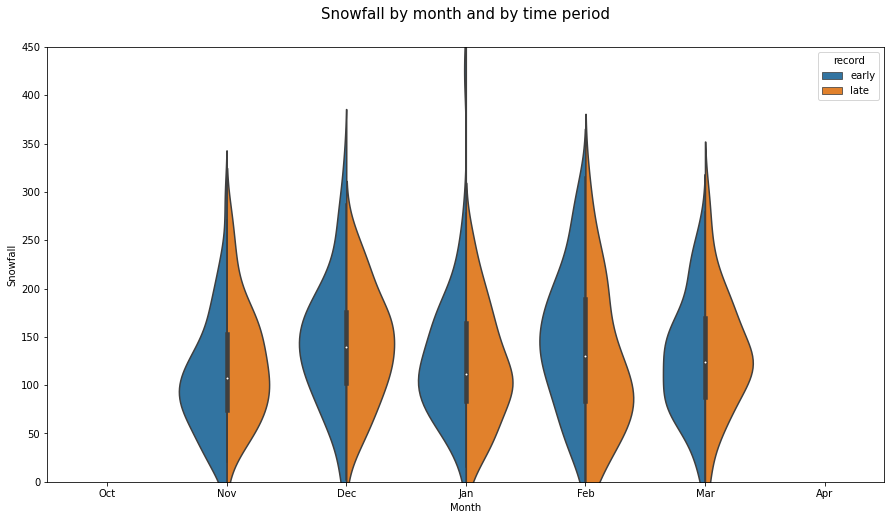

In [161]:
# Eplore what amounts of snowfall we're dealing with per month

# Adding a column to the monthly_data_winter dataframe to be able chornologically split data between 1901 and 2019 in half.
time_record = []
for year in monthly_data_winter['Year']:
    
    if year <= 1960:
        time_record.append('early')
    else:
        time_record.append('late')
time_record2 = np.array(time_record).T

monthly_data_winter = monthly_data_winter.assign(record = time_record2)

# Plotting the monthly snowfall
fig, ax = plt.subplots(figsize = (15,8))
snow_per_month = sns.violinplot(x='Month', 
                                y='Snowfall', 
                                data=monthly_data_winter,
                                order = ('Oct','Nov','Dec','Jan','Feb','Mar', 'Apr'),
                                hue = 'record',
                                split = True
                               
                               )
snow_per_month.set_ylim([0,450])
plt.title('Snowfall by month and by time period', y=1.05, fontsize=15)

> To better undestand the results of our data and which months to use for the *winter analysis*, it is useful to compare the snowfall over the months separately.
It turns out, that the violinplots are similarly shaped even in November and March in the early and late season. One of the more distinct shifts in Snowfall distribution happened in February where the majority of Snowfall amounts declined from about 150mm to 100mm.

> Here the early and late records of the 20th (and early 21st) century don't vary much. Maybe there would be a difference when splitting the data in 4 or more subsets according to the time they were taken.  

Text(0.5, 1.04, 'Correlation between variables by month')

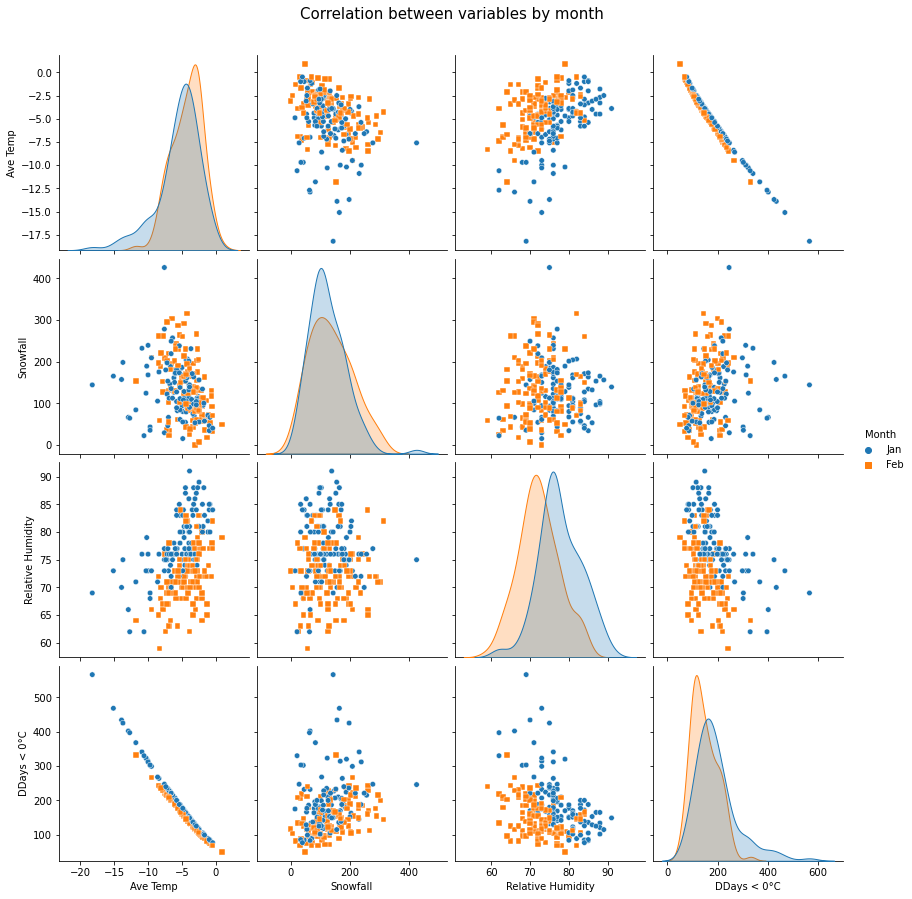

In [156]:
# Plotting correlations by month. Let's see if it changes from the seasonal data.

# Upper right corner different plot?
selected_df_winter_months = monthly_data_winter.loc[:,['Month','Ave Temp', 'Snowfall', 'Relative Humidity', 'DDays < 0°C']]
sns.pairplot(selected_df_winter_months, 
             kind = 'scatter', 
             diag_kind='kde', 
             height=3,
             markers=['o','s'], #,'D' for additional month
             plot_kws={'s':30},
             hue='Month'   # Using hue only really works for spectating a maximum of three months at a time. More months areoverwhelming.
) 
plt.suptitle('Correlation between variables by month', y=1.04, fontsize=15)

> This is rather difficult to read. Best for analyzing 2 months at a time, almost impossible for more than 3 months

<bound method Figure.autofmt_xdate of <Figure size 1440x648 with 1 Axes>>

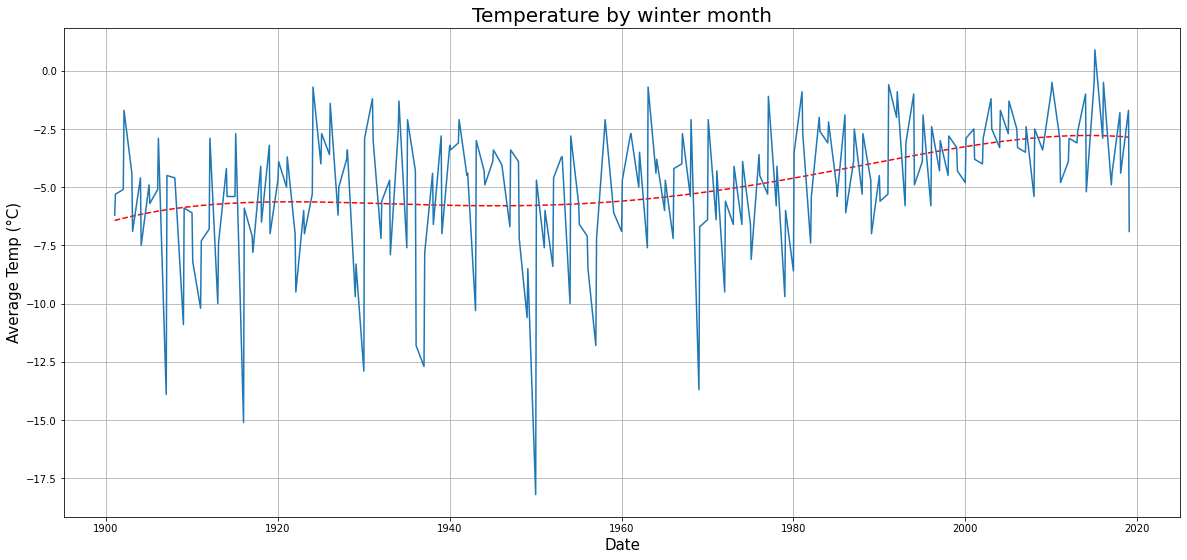

In [140]:
# plotting monthly variables and observations

# turn string into date format, then date to Matplotlib date numbers for the trendline
monthly_data_winter = monthly_data_winter.assign(Year_month2 = pd.to_datetime(monthly_data_winter['Year_month']).dt.date)
num_dates = mdates.date2num(monthly_data_winter['Year_month2'])

X = np.array(num_dates)
Y = np.array(monthly_data_winter['Ave Temp'])
fig, ax = plt.subplots(figsize = (20,9))
np.shape(X)
np.shape(Y)
Z = np.polyfit(X, Y, 4)
ZZ = np.poly1d(Z)
ax.plot(X, ZZ(X),'r--')
ax.plot(X, Y)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Average Temp (°C)', fontsize = 15)
plt.title('Temperature by winter month', fontsize = 20)
plt.grid(True)

# Show X-axis major tick marks as dates
loc = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(loc)
plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
plt.gcf().autofmt_xdate


> The internal variation with the monthly scale seems almost overwhelming, but the trendline helps. The more recent trend show slight warming again

<bound method Figure.autofmt_xdate of <Figure size 1440x648 with 1 Axes>>

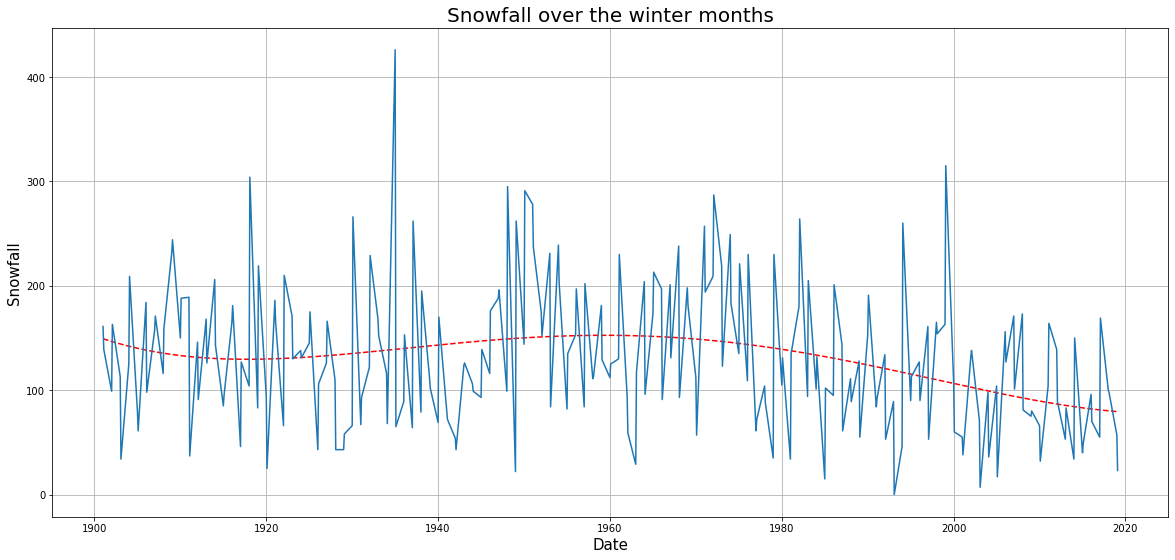

In [139]:
# Snowfall in single winter months

# Create plot
X = np.array(num_dates)
Y = np.array(monthly_data_winter['Snowfall'])
fig, ax = plt.subplots(figsize = (20,9))
np.shape(X)
np.shape(Y)
Z = np.polyfit(X, Y, 4)
ZZ = np.poly1d(Z)
ax.plot(X, ZZ(X),'r--')
ax.plot(X, Y)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Snowfall', fontsize = 15)
plt.title('Snowfall over the winter months', fontsize = 20)
plt.grid(True)

# Show X-axis major tick marks as dates
loc = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(loc)
plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
plt.gcf().autofmt_xdate


> It can be argued that there is an upwards trend in snowfall in the early 1900s and a downwards trend since the 1970s.

<bound method Figure.autofmt_xdate of <Figure size 1440x648 with 1 Axes>>

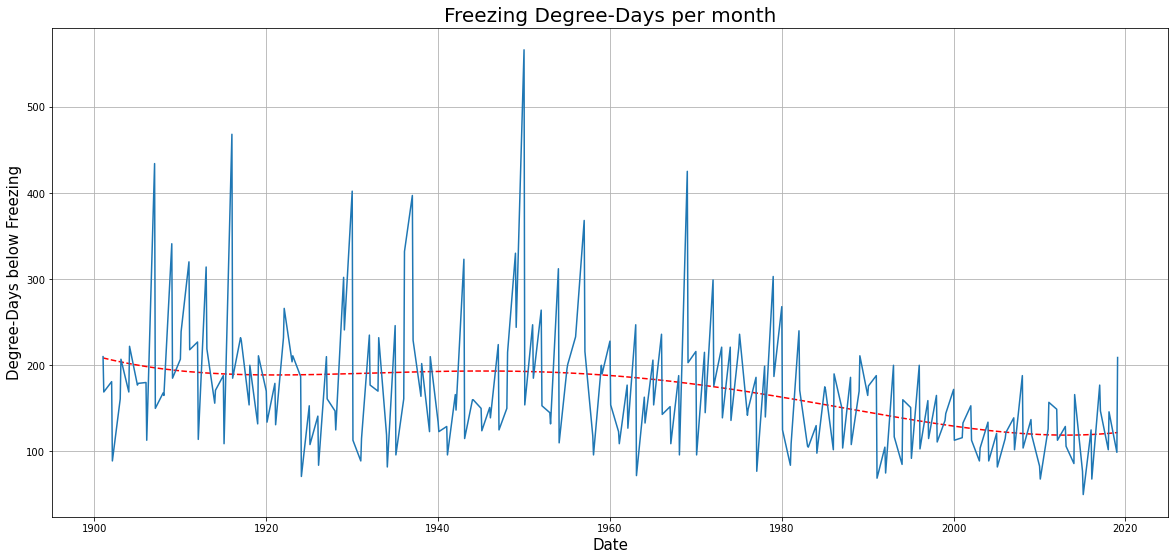

In [138]:
# Again, redefining the months since this graph becomes particularly messy with too many months. 
# Right now: only working with January and February

# Merging the Month and the Year into one column
monthly_data_winter = monthly_data.loc[monthly_data['Month'].isin(winter_months_short)]
monthly_data_winter = monthly_data_winter.assign(Year_month = monthly_data_winter.Year.astype(str) + ' ' + monthly_data_winter.Month.astype(str))

# Turn string into date format, then date to Matplotlib date numbers for the trendline
monthly_data_winter = monthly_data_winter.assign(Year_month2 = pd.to_datetime(monthly_data_winter['Year_month']).dt.date)
num_dates = mdates.date2num(monthly_data_winter['Year_month2'])

# Create plot
X = np.array(num_dates)
Y = np.array(monthly_data_winter['DDays < 0°C'])
fig, ax = plt.subplots(figsize = (20,9))
np.shape(X)
np.shape(Y)
Z = np.polyfit(X, Y, 4)
ZZ = np.poly1d(Z)
ax.plot(X, ZZ(X),'r--')
ax.plot(X, Y)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Degree-Days below Freezing', fontsize = 15)
plt.title('Freezing Degree-Days per month', fontsize = 20)
plt.grid(True)

# Show X-axis major tick marks as dates
loc = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(loc)
plt.gca().xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))
plt.gcf().autofmt_xdate

> The amplitude of the data certainly decreases since the 1960s. Again, this might be due to more precise measurements in recent data. 
Similarly to the snowfall data, there seems to be a downwards trend in recent years since the 1970s. 

In [129]:
### Looking at it through a correlation matrix

# corr = monthly_data_winter.corr()
# fig, ax = plt.subplots(figsize = (20,20))
# sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, 
#             annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))


# To do

- save graphs in images folder for further comparison


# Conclusions

### As mentioned, this notebook and conclusion only cover the data from Whister in British Columbia

- Several graphs show the expected trends since around the 1970s. There is a slight increase in average temperature while snowfall and degree-days below freezing decline. The average temperature even rose by a few degrees Celsius in the investigated time period. From a climatic standpoint, that is a very big margin. 
- Snowfall is also experiencing a substantial decline in the last decades, dipping from close to 200mm to the lower 100s level.
- When dividing the entire record period (1901-2019) into two halves, there is no great change in monthly snowfall to be observed.
- When comparing these results to climate change research, it is noticeable that the trends acutally are consistent with climatic responses on a bigger scale.
- Even the trends from ealier record fit the general climatic trends on earch: Global temperatures were stagnating between 1940 and 1970 before they resumed their steep rise in the 1970s.
- Important note: Analysis from 1 or 10 ski resorts aren't very conclusive. With this data, it is possible to determine if the data agrees with general climatic developments. One big problem of climatology is that the individual event or trend can (almost) never be entirely contributed to a specific cause. Climate responses and dynamics are very complicated, hence I will not draw any bigger conclusions from my data (yet). After analyzing all the ski resorts that I'm hoping to get to, I will answer the questions if there is a general difference between continental and pacific ski resort locations.

- Methods: line plots vs other plots. In climatic analysis, line plots are everything. Often, is less about determining potential correlations between some variables since there are an incredible amount of variables involved and huge datasets are required for a meaningful analysis. With the lineplots however, trends in climatic records can be found and shown.
- Further comments: It could be good to smooth out the data before plotting it